In [ ]:
#!pip install tensorflow

In [1]:
#Import Libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

C:\Users\Chamodi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
output_file_path = "updated_dataset.csv"
data = pd.read_csv(output_file_path, parse_dates=['instance_date'])

In [3]:
#pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
data.head(100)

,transaction_id,procedure_id,trans_group_id,trans_group_en,procedure_name_en,instance_date,property_type_id,property_type_en,property_usage_en,reg_type_id,reg_type_en,area_id,area_name_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rooms_numeric
0,2-13-2010-1387,13,2,Mortgages,Mortgage Registration,2010-03-30,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,1505000.0,4542.71,3.0
1,2-13-2015-7852,13,2,Mortgages,Mortgage Registration,2015-10-26,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,1260000.0,3996.07,2.0
2,1-110-2007-100813,110,1,Sales,Lease to Own Registration,2007-11-22,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,661888.0,2568.54,3.0
3,1-11-2007-101072,11,1,Sales,Sell,2007-11-22,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,2300000.0,5045.74,3.0
4,1-11-2007-100644,11,1,Sales,Sell,2007-08-01,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,1850000.0,4058.53,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3-9-2014-270,9,3,Gifts,Grant,2014-04-21,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,208.04,1425000.0,6849.64,3.0
96,1-110-2007-100843,110,1,Sales,Lease to Own Registration,2007-11-26,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,172.50,648888.0,3761.67,2.0
97,1-11-2017-5969,11,1,Sales,Sell,2017-04-30,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,255.00,2400000.0,9411.76,3.0
98,1-11-2017-92,11,1,Sales,Sell,2017-01-03,4,Villa,Residential,1,Existing Properties,352,Al Thanayah Fourth,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,257.53,2750000.0,10678.37,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791499 entries, 0 to 791498
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   transaction_id       791499 non-null  object        
 1   procedure_id         791499 non-null  int64         
 2   trans_group_id       791499 non-null  int64         
 3   trans_group_en       791499 non-null  object        
 4   procedure_name_en    791499 non-null  object        
 5   instance_date        791499 non-null  datetime64[ns]
 6   property_type_id     791499 non-null  int64         
 7   property_type_en     791499 non-null  object        
 8   property_usage_en    791499 non-null  object        
 9   reg_type_id          791499 non-null  int64         
 10  reg_type_en          791499 non-null  object        
 11  area_id              791499 non-null  int64         
 12  area_name_en         791499 non-null  object        
 13  nearest_landma

In [5]:
data.describe()

,procedure_id,trans_group_id,instance_date,property_type_id,reg_type_id,area_id,has_parking,procedure_area,actual_worth,meter_sale_price,rooms_numeric
count,791499.000000,791499.000000,791499,791499.000000,791499.000000,791499.000000,791499.000000,791499.000000,7.914990e+05,7.914990e+05,791499.000000
mean,66.023100,1.222106,2016-01-08 06:15:44.370112768,3.104892,0.618812,413.595207,0.776667,124.698802,1.498170e+06,1.457725e+04,1.884737
min,4.000000,1.000000,2004-05-05 00:00:00,3.000000,0.000000,232.000000,0.000000,0.090000,1.000000e+00,1.000000e-02,1.000000
25%,11.000000,1.000000,2011-12-06 00:00:00,3.000000,0.000000,350.000000,1.000000,66.000000,6.000000e+05,7.461560e+03,1.000000
50%,41.000000,1.000000,2015-11-03 00:00:00,3.000000,1.000000,412.000000,1.000000,93.950000,1.048800e+06,1.029650e+04,1.884737
75%,102.000000,1.000000,2020-07-09 00:00:00,3.000000,1.000000,463.000000,1.000000,149.200000,1.755070e+06,1.518788e+04,2.000000
max,861.000000,3.000000,2023-02-28 00:00:00,4.000000,1.000000,531.000000,1.000000,55362.940000,3.013326e+09,2.181199e+07,9.000000
std,94.620658,0.478606,NaN,0.306415,0.485679,66.108076,0.416480,153.805551,4.471178e+06,1.242419e+05,0.824750


In [6]:
# Get unique values and their counts in 'rooms_en'
unique_rooms = data['rooms_en'].value_counts()
print("Unique values in 'rooms_en' and their counts:")
print(unique_rooms)

Unique values in 'rooms_en' and their counts:
rooms_en
1 B/R          257269
2 B/R          185319
Studio         132702
3 B/R          107915
Office          55973
4 B/R           33148
Shop            11434
5 B/R            4232
PENTHOUSE        1779
Single Room       769
6 B/R             589
Store             321
7 B/R              27
GYM                16
8 B/R               4
9 B/R               2
Name: count, dtype: int64


In [7]:
column_name = 'has_parking'
value_counts = data[column_name].value_counts()
print(f"Value counts in '{column_name}':\n{value_counts}")

Value counts in 'has_parking':
has_parking
1    614731
0    176768
Name: count, dtype: int64


In [8]:
# Exploratory Data Analysis (EDA)
print(data.describe())

        procedure_id  trans_group_id                  instance_date  \
count  791499.000000   791499.000000                         791499   
mean       66.023100        1.222106  2016-01-08 06:15:44.370112768   
min         4.000000        1.000000            2004-05-05 00:00:00   
25%        11.000000        1.000000            2011-12-06 00:00:00   
50%        41.000000        1.000000            2015-11-03 00:00:00   
75%       102.000000        1.000000            2020-07-09 00:00:00   
max       861.000000        3.000000            2023-02-28 00:00:00   
std        94.620658        0.478606                            NaN   

       property_type_id    reg_type_id        area_id    has_parking  \
count     791499.000000  791499.000000  791499.000000  791499.000000   
mean           3.104892       0.618812     413.595207       0.776667   
min            3.000000       0.000000     232.000000       0.000000   
25%            3.000000       0.000000     350.000000       1.000000   


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


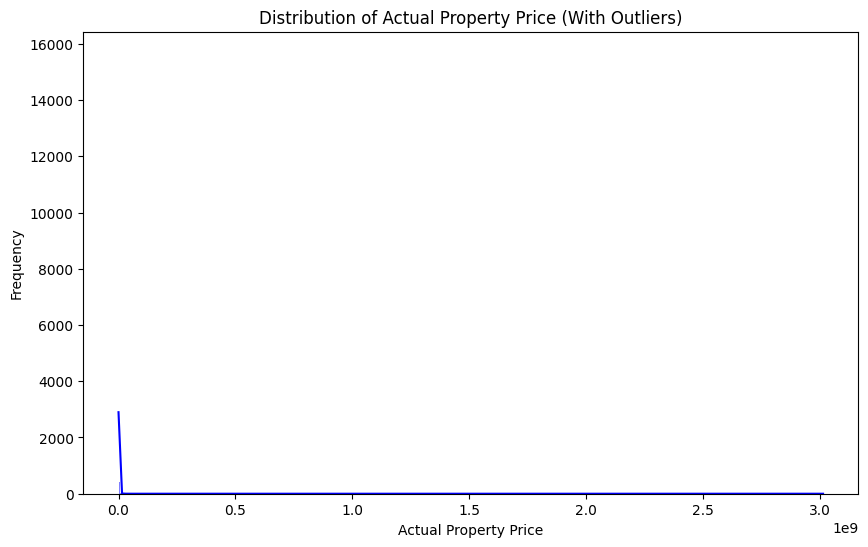

In [9]:
# Visualization: Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_worth'], kde=True, color='blue')
plt.title('Distribution of Actual Property Price (With Outliers)')
plt.xlabel('Actual Property Price')
plt.ylabel('Frequency')
plt.show()

In [12]:
lower_percentile = data['actual_worth'].quantile(0.01)
upper_percentile = data['actual_worth'].quantile(0.99)

print (lower_percentile, upper_percentile)

filtered_data = data[(data['actual_worth'] >= lower_percentile) & (data['actual_worth'] <= upper_percentile)]

199000.0 7632022.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


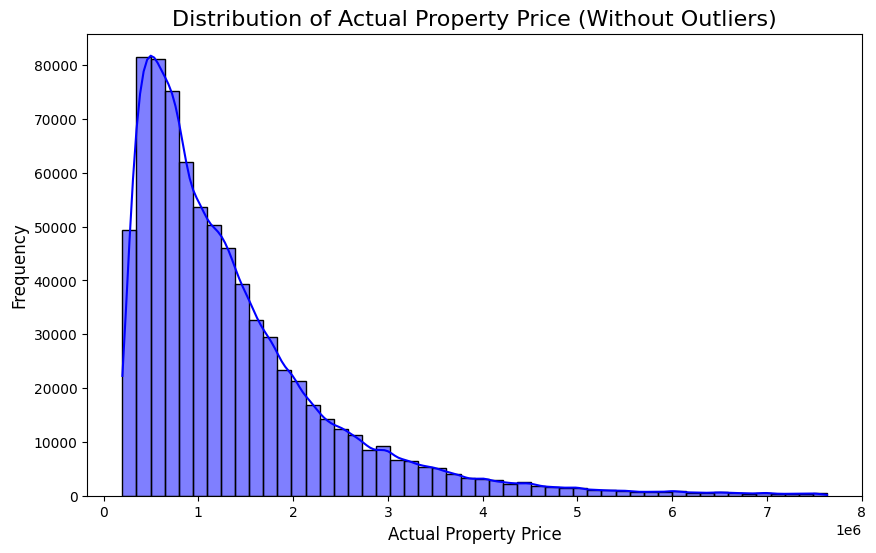

In [13]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['actual_worth'], kde=True, bins=50, color='blue')
plt.title('Distribution of Actual Property Price (Without Outliers)', fontsize=16)
plt.xlabel('Actual Property Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

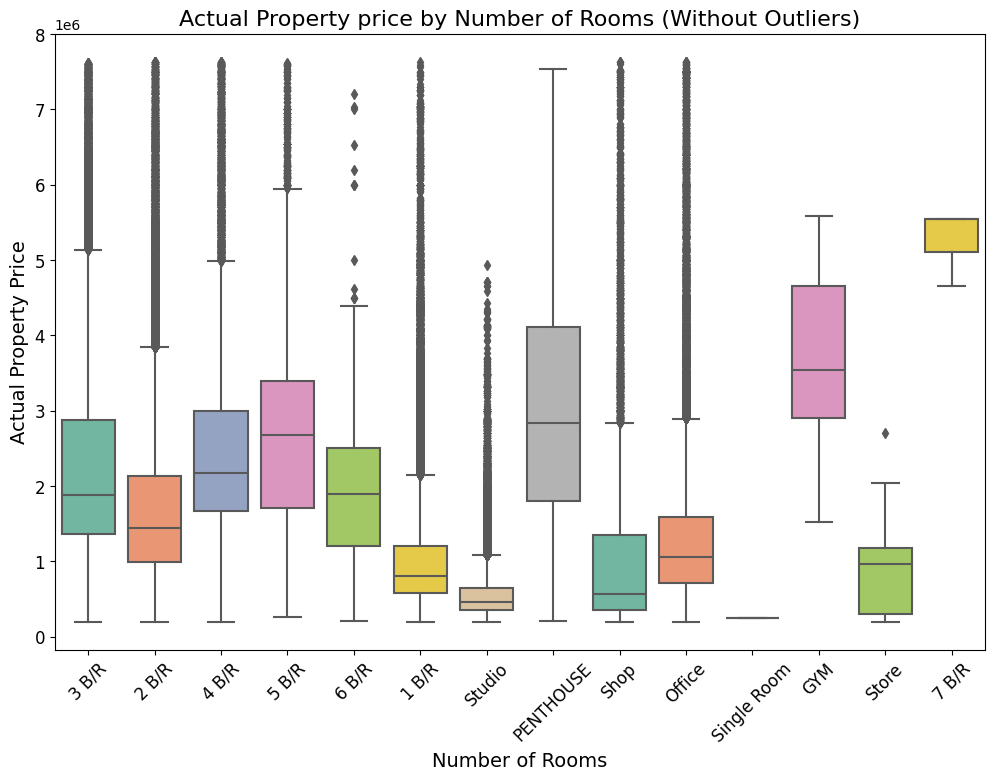

In [15]:
# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='rooms_en',
    y='actual_worth',
    data=filtered_data,
    palette="Set2"
)
plt.title('Actual Property price by Number of Rooms (Without Outliers)', fontsize=16)
plt.xlabel('Number of Rooms', fontsize=14)
plt.ylabel('Actual Property Price', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)
plt.show()

In [17]:
# Compute z-scores
data['z_score'] = zscore(data['actual_worth'])

In [18]:
# Filter data within threshold (|z| < 3)
filtered_data_z = data[(data['z_score'].abs() < 3)]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


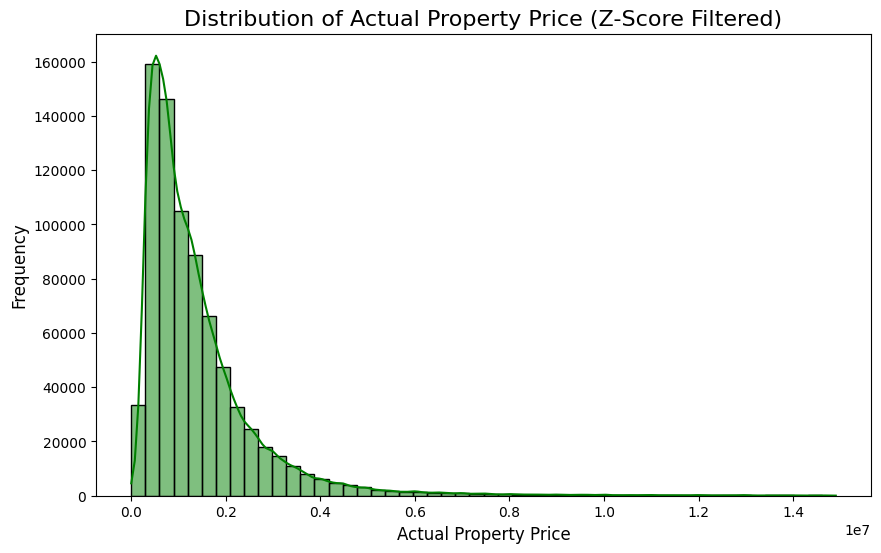

In [19]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_z['actual_worth'], kde=True, bins=50, color='green')
plt.title('Distribution of Actual Property Price (Z-Score Filtered)', fontsize=16)
plt.xlabel('Actual Property Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

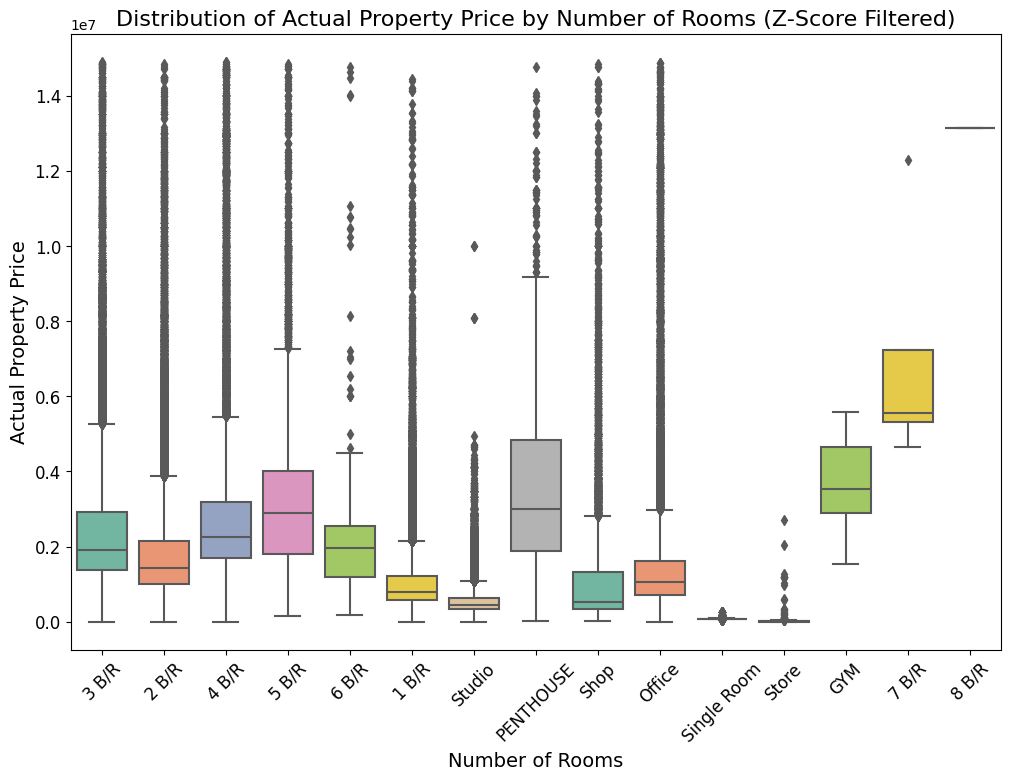

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='rooms_en',
    y='actual_worth',
    data=filtered_data_z,
    palette="Set2"
)
plt.title('Distribution of Actual Property Price by Number of Rooms (Z-Score Filtered)', fontsize=16)
plt.xlabel('Number of Rooms', fontsize=14)
plt.ylabel('Actual Property Price', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [21]:
median = data['actual_worth'].median()
mad = np.median(np.abs(data['actual_worth'] - median))
data['modified_z'] = 0.6745 * (data['actual_worth'] - median) / mad

In [22]:
# Filter using |modified_z| < 3.5
filtered_data_modz = data[data['modified_z'].abs() < 3.5]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


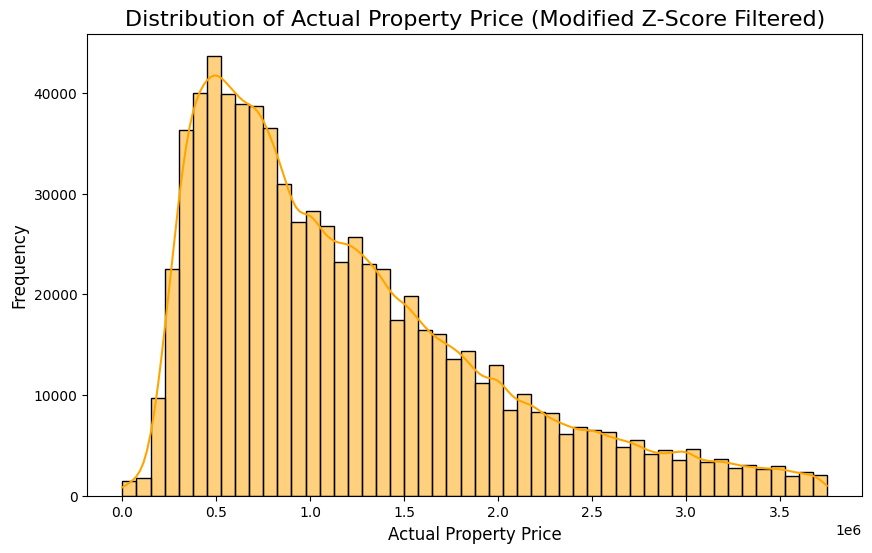

In [23]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_modz['actual_worth'], kde=True, bins=50, color='orange')
plt.title('Distribution of Actual Property Price (Modified Z-Score Filtered)', fontsize=16)
plt.xlabel('Actual Property Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

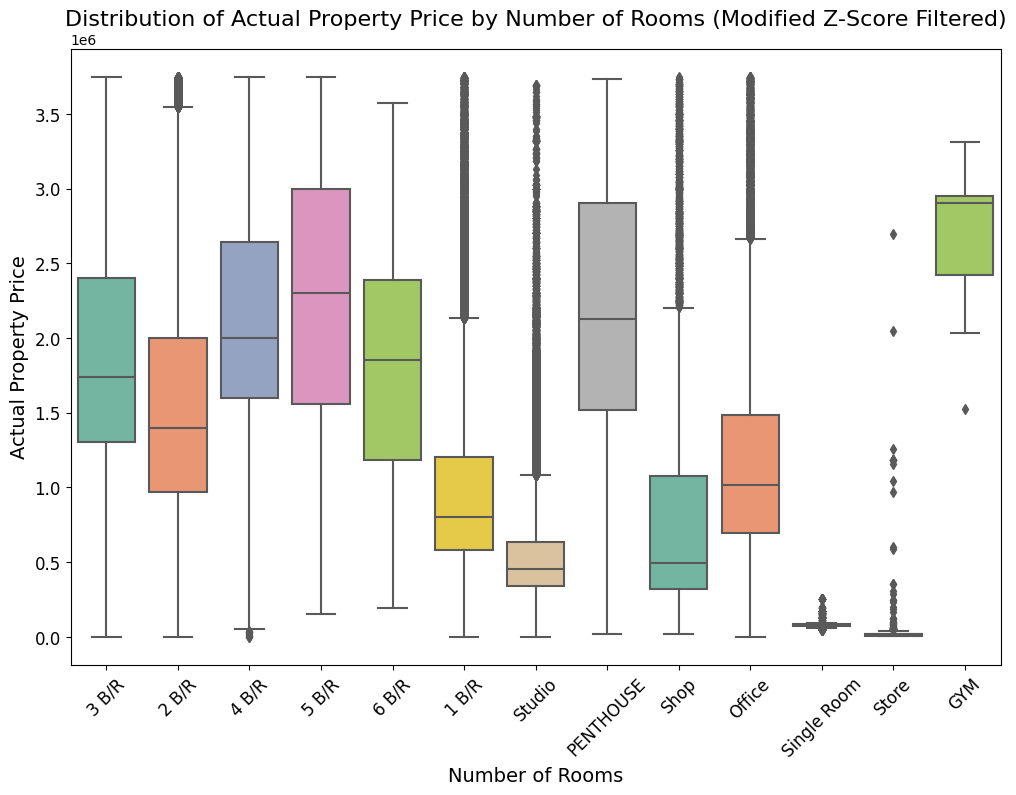

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='rooms_en',
    y='actual_worth',
    data=filtered_data_modz,
    palette="Set2"
)
plt.title('Distribution of Actual Property Price by Number of Rooms (Modified Z-Score Filtered)', fontsize=16)
plt.xlabel('Number of Rooms', fontsize=14)
plt.ylabel('Actual Property Price', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [25]:
output_file_path = "Outlier_Filtered_Dataset.csv"
data.to_csv(output_file_path, index=False)

## statical Analysis & Feature Analysis

In [30]:
data.describe()

,procedure_id,trans_group_id,instance_date,property_type_id,reg_type_id,area_id,has_parking,procedure_area,actual_worth,meter_sale_price,rooms_numeric,z_score,modified_z
count,791499.000000,791499.000000,791499,791499.000000,791499.000000,791499.000000,791499.000000,791499.000000,7.914990e+05,7.914990e+05,791499.000000,7.914990e+05,791499.000000
mean,66.023100,1.222106,2016-01-08 06:15:44.370112768,3.104892,0.618812,413.595207,0.776667,124.698802,1.498170e+06,1.457725e+04,1.884737,-2.215568e-17,0.582563
min,4.000000,1.000000,2004-05-05 00:00:00,3.000000,0.000000,232.000000,0.000000,0.090000,1.000000e+00,1.000000e-02,1.000000,-3.350727e-01,-1.359663
25%,11.000000,1.000000,2011-12-06 00:00:00,3.000000,0.000000,350.000000,1.000000,66.000000,6.000000e+05,7.461560e+03,1.000000,-2.008800e-01,-0.581824
50%,41.000000,1.000000,2015-11-03 00:00:00,3.000000,1.000000,412.000000,1.000000,93.950000,1.048800e+06,1.029650e+04,1.884737,-1.005037e-01,0.000000
75%,102.000000,1.000000,2020-07-09 00:00:00,3.000000,1.000000,463.000000,1.000000,149.200000,1.755070e+06,1.518788e+04,2.000000,5.745696e-02,0.915608
max,861.000000,3.000000,2023-02-28 00:00:00,4.000000,1.000000,531.000000,1.000000,55362.940000,3.013326e+09,2.181199e+07,9.000000,6.736099e+02,3905.115872
std,94.620658,0.478606,NaN,0.306415,0.485679,66.108076,0.416480,153.805551,4.471178e+06,1.242419e+05,0.824750,1.000001e+00,5.796435


In [31]:
filtered_data.describe()

,procedure_id,trans_group_id,instance_date,property_type_id,reg_type_id,area_id,has_parking,procedure_area,actual_worth,meter_sale_price,rooms_numeric
count,776169.000000,776169.000000,776169,776169.000000,776169.000000,776169.000000,776169.000000,776169.000000,7.761690e+05,7.761690e+05,776169.000000
mean,66.159070,1.221270,2016-01-06 21:09:29.395067392,3.106361,0.618186,413.972013,0.778048,121.319833,1.356200e+06,1.432220e+04,1.873381
min,9.000000,1.000000,2004-05-05 00:00:00,3.000000,0.000000,232.000000,0.000000,0.090000,1.990000e+05,1.076000e+01,1.000000
25%,11.000000,1.000000,2011-12-13 00:00:00,3.000000,0.000000,350.000000,1.000000,66.330000,6.070000e+05,7.497960e+03,1.000000
50%,41.000000,1.000000,2015-11-03 00:00:00,3.000000,1.000000,412.000000,1.000000,93.830000,1.047880e+06,1.029116e+04,1.884737
75%,102.000000,1.000000,2020-07-01 00:00:00,3.000000,1.000000,464.000000,1.000000,147.440000,1.738400e+06,1.507006e+04,2.000000
max,861.000000,3.000000,2023-02-28 00:00:00,4.000000,1.000000,531.000000,1.000000,55362.940000,7.632022e+06,1.445390e+07,7.000000
std,94.738199,0.476955,NaN,0.308299,0.485832,66.186275,0.415559,136.051541,1.077517e+06,1.223595e+05,0.814929


In [32]:
filtered_data_z.describe()

,procedure_id,trans_group_id,instance_date,property_type_id,reg_type_id,area_id,has_parking,procedure_area,actual_worth,meter_sale_price,rooms_numeric,z_score
count,789132.000000,789132.000000,789132,789132.000000,789132.000000,789132.000000,789132.000000,789132.000000,7.891320e+05,7.891320e+05,789132.000000,789132.000000
mean,66.016915,1.222173,2016-01-05 16:58:58.851294720,3.105055,0.619316,413.647722,0.776281,122.566540,1.406306e+06,1.436341e+04,1.880295,-0.020546
min,4.000000,1.000000,2004-05-05 00:00:00,3.000000,0.000000,232.000000,0.000000,0.090000,1.000000e+00,1.000000e-02,1.000000,-0.335073
25%,11.000000,1.000000,2011-12-05 00:00:00,3.000000,0.000000,350.000000,1.000000,65.960000,6.000000e+05,7.452058e+03,1.000000,-0.200880
50%,41.000000,1.000000,2015-11-01 00:00:00,3.000000,1.000000,412.000000,1.000000,93.730000,1.044000e+06,1.027655e+04,1.884737,-0.101577
75%,102.000000,1.000000,2020-07-05 00:00:00,3.000000,1.000000,463.000000,1.000000,148.440000,1.750000e+06,1.512738e+04,2.000000,0.056323
max,861.000000,3.000000,2023-02-28 00:00:00,4.000000,1.000000,531.000000,1.000000,55362.940000,1.490189e+07,1.445390e+07,8.000000,2.997806
std,94.726436,0.478670,NaN,0.306624,0.485555,66.135384,0.416736,139.190489,1.311491e+06,1.213763e+05,0.819266,0.293321


In [33]:
filtered_data_modz.describe()

,procedure_id,trans_group_id,instance_date,property_type_id,reg_type_id,area_id,has_parking,procedure_area,actual_worth,meter_sale_price,rooms_numeric,z_score,modified_z
count,752117.000000,752117.000000,752117,752117.000000,752117.000000,752117.000000,752117.000000,752117.000000,7.521170e+05,7.521170e+05,752117.000000,752117.000000,752117.000000
mean,66.034332,1.225248,2015-12-21 23:22:42.565133056,3.105303,0.624043,414.768704,0.773276,114.750709,1.194883e+06,1.380666e+04,1.837508,-0.067832,0.189382
min,4.000000,1.000000,2004-05-05 00:00:00,3.000000,0.000000,232.000000,0.000000,0.090000,1.000000e+00,1.000000e-02,1.000000,-0.335073,-1.359663
25%,11.000000,1.000000,2011-11-03 00:00:00,3.000000,0.000000,350.000000,1.000000,64.180000,5.854000e+05,7.338590e+03,1.000000,-0.204145,-0.600752
50%,41.000000,1.000000,2015-10-27 00:00:00,3.000000,1.000000,434.000000,1.000000,90.360000,9.998880e+05,1.001302e+04,1.884737,-0.111443,-0.063410
75%,102.000000,1.000000,2020-05-13 00:00:00,3.000000,1.000000,464.000000,1.000000,140.340000,1.612000e+06,1.447177e+04,2.000000,0.025459,0.730132
max,861.000000,3.000000,2023-02-28 00:00:00,4.000000,1.000000,531.000000,1.000000,55362.940000,3.748441e+06,1.445390e+07,6.000000,0.503284,3.499814
std,95.884019,0.480118,NaN,0.306943,0.484369,66.266230,0.418713,129.550963,7.827891e+05,1.242654e+05,0.790733,0.175075,1.014808


In [34]:
data.describe(include='object')

,transaction_id,trans_group_en,procedure_name_en,property_type_en,property_usage_en,reg_type_en,area_name_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en
count,791499,791499,791499,791499,791499,791499,791499,791499,791499,791499,791499
unique,791499,3,40,2,5,2,77,15,38,6,16
top,2-13-2010-1387,Sales,Sell - Pre registration,Unit,Residential,Existing Properties,Marsa Dubai,Burj Al Arab,Unknown,Marina Mall,1 B/R
freq,1,637978,283792,708477,691235,489789,103890,188720,119182,313456,257269


In [35]:
filtered_data.describe(include='object')

,transaction_id,trans_group_en,procedure_name_en,property_type_en,property_usage_en,reg_type_en,area_name_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en
count,776169,776169,776169,776169,776169,776169,776169,776169,776169,776169,776169
unique,776169,3,39,2,5,2,76,15,38,6,14
top,2-13-2010-1387,Sales,Sell - Pre registration,Unit,Residential,Existing Properties,Marsa Dubai,Sports City Swimming Academy,Unknown,Marina Mall,1 B/R
freq,1,625839,278684,693615,679694,479817,101686,185287,118072,307036,255979


In [14]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(filtered_data['actual_worth']))
print("Kurtosis:", kurtosis(filtered_data['actual_worth']))

Skewness: 2.0201754654695034
Kurtosis: 5.433957575699797


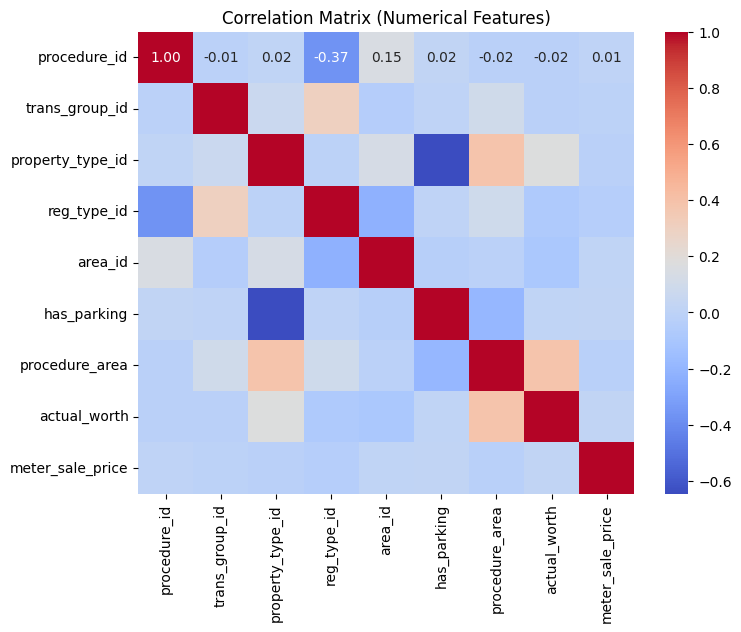

In [9]:
numeric_data = filtered_data.select_dtypes(include=['number'])

# Now create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

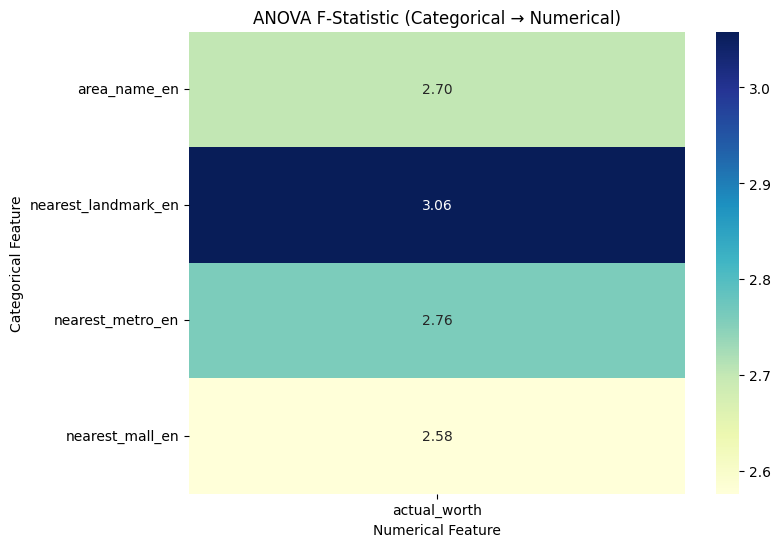

In [15]:
from sklearn.feature_selection import f_classif


# Categorical columns (encoded or label-encoded)
categorical_cols = ['area_name_en', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en']
# Numerical target
numerical_cols = ['actual_worth']  # or replace with other numerical features you're analyzing

anova_scores = {}

for num_col in numerical_cols:
    scores = []
    for cat_col in categorical_cols:
        # Drop missing and encode categories as numbers
        temp = filtered_data[[cat_col, num_col]].dropna()
        temp[cat_col] = temp[cat_col].astype('category').cat.codes
        f_val, _ = f_classif(temp[[cat_col]], temp[num_col])
        scores.append(f_val[0])
    anova_scores[num_col] = scores

# Convert to DataFrame
anova_df = pd.DataFrame(anova_scores, index=categorical_cols)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(anova_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("ANOVA F-Statistic (Categorical → Numerical)")
plt.xlabel("Numerical Feature")
plt.ylabel("Categorical Feature")
plt.show()

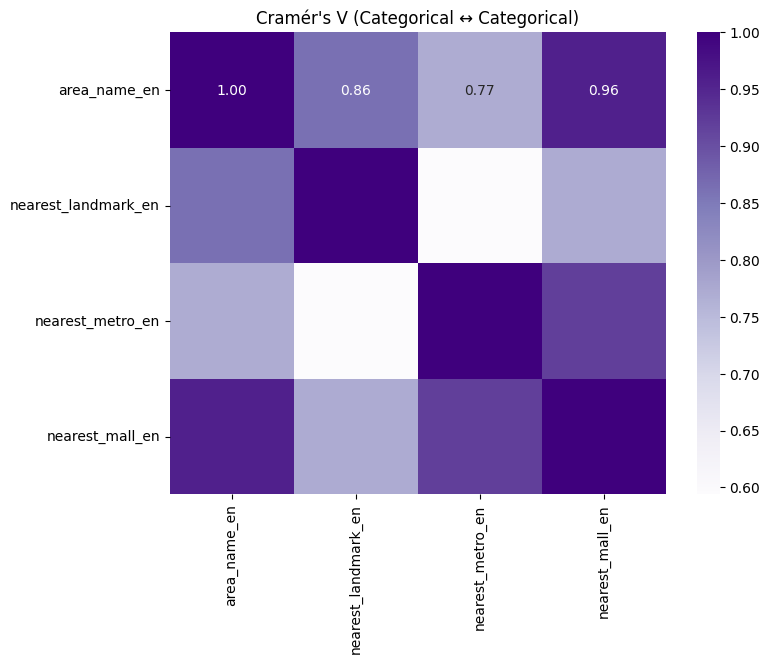

In [14]:
from scipy.stats import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.size == 0:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Your categorical columns
cat_cols = ['area_name_en', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en']

# Create empty DataFrame to store results
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Calculate Cramér’s V
for col1 in cat_cols:
    for col2 in cat_cols:
        try:
            val = cramers_v(filtered_data[col1], filtered_data[col2])
        except:
            val = np.nan
        cramers_matrix.loc[col1, col2] = val

# Convert to float and replace any NaNs with 0
cramers_matrix = cramers_matrix.astype(float).fillna(0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_matrix, annot=True, cmap="Purples", fmt=".2f")
plt.title("Cramér's V (Categorical ↔ Categorical)")
plt.show()

In [36]:
filtered_data.columns

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group_en',
       'procedure_name_en', 'instance_date', 'property_type_id',
       'property_type_en', 'property_usage_en', 'reg_type_id', 'reg_type_en',
       'area_id', 'area_name_en', 'nearest_landmark_en', 'nearest_metro_en',
       'nearest_mall_en', 'rooms_en', 'has_parking', 'procedure_area',
       'actual_worth', 'meter_sale_price'],
      dtype='object')

In [37]:
#VIF Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select only numeric features
numeric_cols = [
    'procedure_id', 'trans_group_id', 'property_type_id', 'reg_type_id',
    'area_id', 'has_parking', 'procedure_area', 'actual_worth', 'meter_sale_price'
]

# Drop rows with missing values (just in case)
vif_data = filtered_data[numeric_cols].dropna()

# Add constant for VIF calculation
X = add_constant(vif_data)

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            Feature         VIF
0             const  289.361410
1      procedure_id    1.184190
2    trans_group_id    1.131935
3  property_type_id    2.182419
4       reg_type_id    1.453660
5           area_id    1.104183
6       has_parking    1.770578
7    procedure_area    3.768717
8      actual_worth    4.034537
9  meter_sale_price    2.168844
